<a href="https://colab.research.google.com/github/Inyrkz/diabetes_research_project/blob/main/Diabetes_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# importing library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# load the dataset
dataset = pd.read_csv("diabetes.csv")
dataset.head(10)

Pregnancies  Glucose  BloodPressure  ...  DiabetesPedigreeFunction  Age  Outcome
0            6      148             72  ...                     0.627   50        1
1            1       85             66  ...                     0.351   31        0
2            8      183             64  ...                     0.672   32        1
3            1       89             66  ...                     0.167   21        0
4            0      137             40  ...                     2.288   33        1
5            5      116             74  ...                     0.201   30        0
6            3       78             50  ...                     0.248   26        1
7           10      115              0  ...                     0.134   29        0
8            2      197             70  ...                     0.158   53        1
9            8      125             96  ...                     0.232   54        1

[10 rows x 9 columns]

In [ ]:
# check size of dataset
print("Dataset Shape", dataset.shape)

# check the number of non-values in each column
print(dataset.count(0), sep='\n')

# check the number of non-values in each row
print(dataset.count(1), sep='\n')

Dataset Shape (768, 9)
Pregnancies                 768
Glucose                     768
BloodPressure               768
SkinThickness               768
Insulin                     768
BMI                         768
DiabetesPedigreeFunction    768
Age                         768
Outcome                     768
dtype: int64
0      9
1      9
2      9
3      9
4      9
      ..
763    9
764    9
765    9
766    9
767    9
Length: 768, dtype: int64


In [ ]:
dataset.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
label_count = dataset['Outcome'].value_counts()
print(label_count.index)
label_count

Int64Index([0, 1], dtype='int64')


0    500
1    268
Name: Outcome, dtype: int64

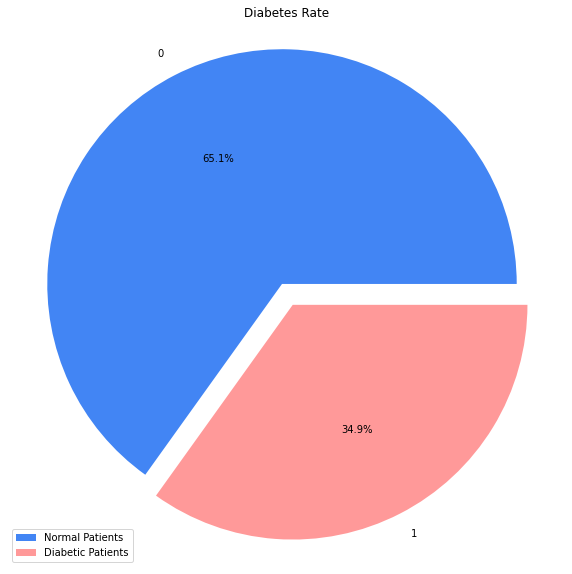

In [ ]:
# Draw a pie chart with the values above
plt.figure(figsize=(10, 10))
plt.pie(label_count,
        labels=label_count.index,
        autopct='%1.1f%%',
        explode=(0,0.1),
        colors=['#4285f4','#ff9999'])
plt.title('Diabetes Rate')
plt.legend(['Normal Patients', 'Diabetic Patients'])
plt.axis('equal')
plt.show()

In [ ]:
# install pandas-profiling
!pip install -U pandas-profiling

In [ ]:
# Exploratory data analysis with pandas profiling
import pandas_profiling

profile = dataset.profile_report(title='Diabetes Profiling Report')
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# Features Extraction
X = dataset.iloc[:, :-1].values
y = dataset['Outcome'].values
print(X)
print(y)

[[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]]
[1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0
 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1
 1 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0
 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0
 1 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0
 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 1 1 0 0 1 0

In [ ]:
# Split dataset into training and test set
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25,
                                                  random_state=22,
                                                  stratify=y)

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_val = scaler.transform(X_val)
print(scaled_X_train)
print(scaled_X_val)
print(len(scaled_X_train))
print(len(scaled_X_val))

[[ 1.51214227  1.09769144  0.88347588 ...  0.28901595  2.20443394
   0.68529843]
 [ 0.63146083 -0.06938264 -1.07984593 ... -0.66513702  2.60031618
  -0.05175283]
 [-0.83634158  0.21450024  1.53791648 ... -0.01578291  2.60952275
  -0.05175283]
 ...
 [-0.24922062  0.8453511  -0.20725846 ...  0.05047771 -0.65880743
  -0.95259325]
 [ 0.04433986  0.30912787 -0.09818503 ...  0.12999046 -0.95341748
  -0.46122575]
 [-0.5427811  -0.85794621 -0.09818503 ... -0.81091039  0.27719323
  -1.03448783]]
[[-0.24922062  0.02524499  0.44718214 ... -1.20847412 -0.66494514
   0.52150926]
 [-1.12990206 -0.13246773 -0.20725846 ... -0.17480841  0.06851111
  -0.95259325]
 [-0.83634158  0.15141516 -0.53447876 ... -0.26757328 -0.37340395
   1.09477135]
 ...
 [-0.83634158 -0.4794357   0.01088841 ...  0.27576383 -1.00865686
  -0.95259325]
 [ 1.21858179 -1.17337163  0.22903527 ...  0.81910093 -0.04196765
   0.43961468]
 [ 1.51214227 -2.02502029  0.55625558 ...  0.09023408 -1.14982417
   0.60340384]]
576
192


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score
from sklearn.metrics import precision_score, f1_score, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

def evaluate_model(y_val, y_pred):
  """Function to evaluate model and return the metric of the model
  
  It returns a dictionary with the classification metrics.
  """
  accuracy = accuracy_score(y_val, y_pred)
  precision = precision_score(y_val, y_pred, average='macro')
  recall = recall_score(y_val, y_pred, average='macro')
  f1 = f1_score(y_val, y_pred, average='macro')
  result = {"accuracy_score": accuracy,
            "precision_score": precision,
            "recall_score": recall,
            "f1_score": f1}
  return result

def plot_confusion_matrix(y_val, y_pred, label):
  '''function to plot confusion matrix

  Args
  y_val: array. The validation set of the target variable.
  y_pred: array. Model's prediction.
  label: list. A list containing all the classes in the target variable

  Returns
  It returns a plot of the confusion matrix
  '''
  cm = confusion_matrix(y_val, y_pred)
  fig, ax = plt.subplots(figsize=(10,10))
  ConfusionMatrixDisplay(cm, display_labels=label).plot(ax=ax, values_format='')

# class labels
label = ['Normal', 'Diabetic']

# Training with Logistic Regression

{'accuracy_score': 0.8072916666666666, 'precision_score': 0.7956932773109244, 'recall_score': 0.7688955223880597, 'f1_score': 0.7787122698813195}
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       125
           1       0.77      0.64      0.70        67

    accuracy                           0.81       192
   macro avg       0.80      0.77      0.78       192
weighted avg       0.80      0.81      0.80       192



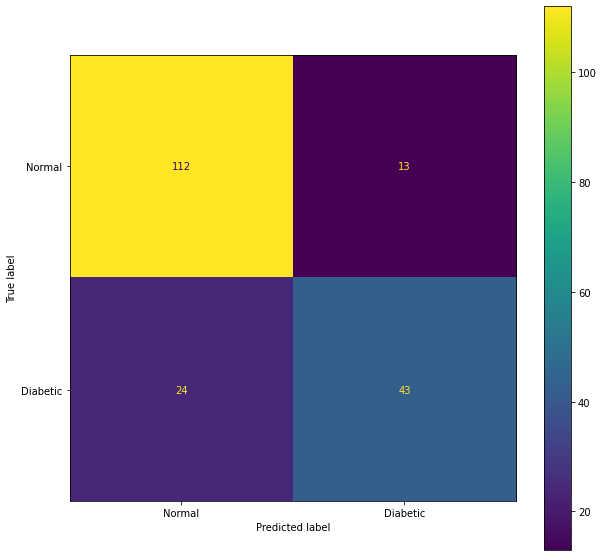

In [ ]:
from sklearn.linear_model import LogisticRegression

logistic_regression_model = LogisticRegression(max_iter=300, C=0.5)
logistic_regression_model.fit(scaled_X_train, y_train)
logistic_regression_y_pred = logistic_regression_model.predict(scaled_X_val)

logistic_reg_result = evaluate_model(y_val, logistic_regression_y_pred)
print(logistic_reg_result)
plot_confusion_matrix(y_val, logistic_regression_y_pred, label)
print(classification_report(y_val, logistic_regression_y_pred))

# Training with KNN Algorithm

{'accuracy_score': 0.8072916666666666, 'precision_score': 0.7916666666666667, 'recall_score': 0.7758208955223881, 'f1_score': 0.782346272863752}
              precision    recall  f1-score   support

           0       0.83      0.88      0.86       125
           1       0.75      0.67      0.71        67

    accuracy                           0.81       192
   macro avg       0.79      0.78      0.78       192
weighted avg       0.80      0.81      0.80       192



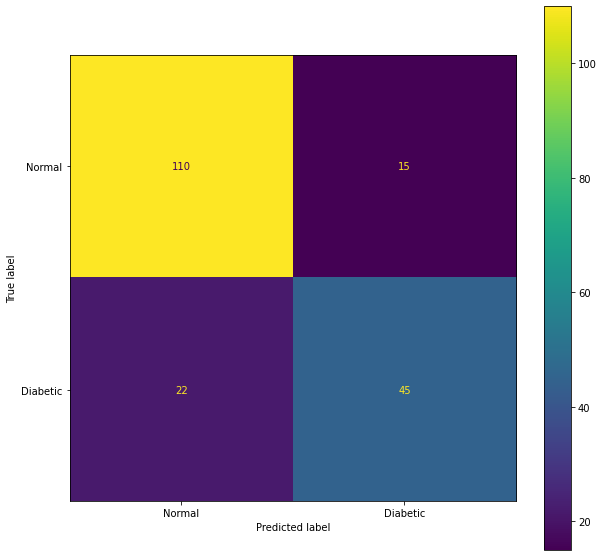

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=9, metric='minkowski', p=2)
knn_model.fit(scaled_X_train, y_train)
knn_y_pred = knn_model.predict(scaled_X_val)

knn_result = evaluate_model(y_val, knn_y_pred)
print(knn_result)
plot_confusion_matrix(y_val, knn_y_pred, label)
print(classification_report(y_val, knn_y_pred))

# Training with Support Vector Machine

{'accuracy_score': 0.7916666666666666, 'precision_score': 0.7728694781629333, 'recall_score': 0.7603582089552239, 'f1_score': 0.765625}
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       125
           1       0.72      0.66      0.69        67

    accuracy                           0.79       192
   macro avg       0.77      0.76      0.77       192
weighted avg       0.79      0.79      0.79       192



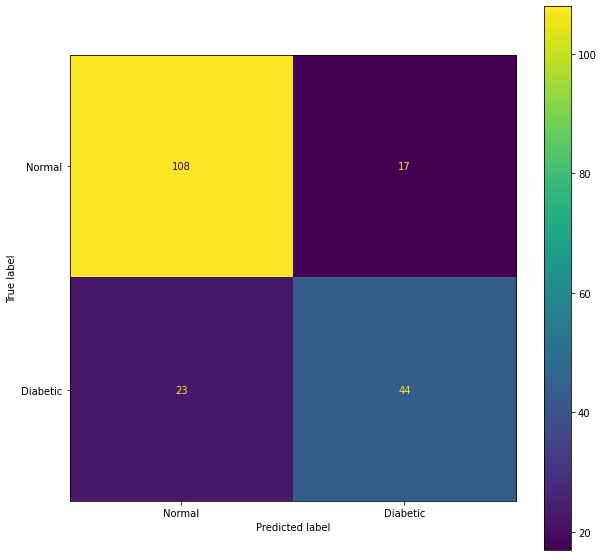

In [ ]:
from sklearn import svm
svm_model = svm.SVC(kernel='rbf')
svm_model.fit(scaled_X_train, y_train)
y_pred_svm = svm_model.predict(scaled_X_val)

svm_result = evaluate_model(y_val, y_pred_svm)
print(svm_result)
print(classification_report(y_val, y_pred_svm))
plot_confusion_matrix(y_val, y_pred_svm, label)

# Training with Random Forest Classifier

{'accuracy_score': 0.8125, 'precision_score': 0.7986491652860965, 'recall_score': 0.7798208955223881, 'f1_score': 0.7873754152823921}
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       125
           1       0.76      0.67      0.71        67

    accuracy                           0.81       192
   macro avg       0.80      0.78      0.79       192
weighted avg       0.81      0.81      0.81       192



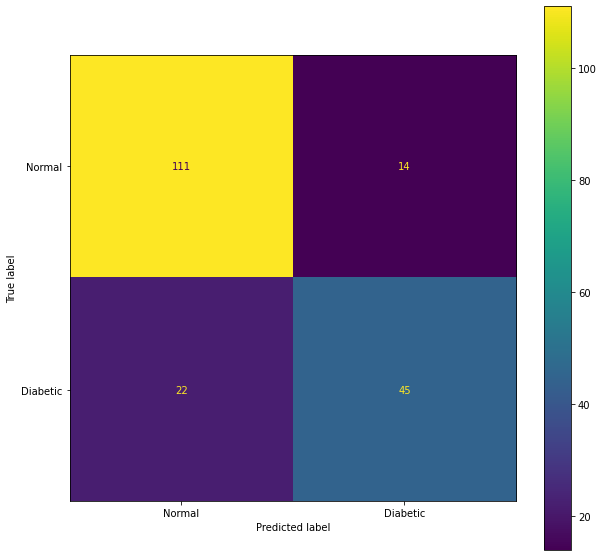

In [ ]:
from sklearn.ensemble import RandomForestClassifier

random_forest_model = RandomForestClassifier(n_estimators=110,
                                             criterion="entropy",
                                             min_samples_split=30,
                                             random_state=0)
random_forest_model.fit(scaled_X_train, y_train)
random_forest_y_pred = random_forest_model.predict(scaled_X_val)

random_forest_result = evaluate_model(y_val, random_forest_y_pred)
print(random_forest_result)
print(classification_report(y_val, random_forest_y_pred))
plot_confusion_matrix(y_val, random_forest_y_pred, label)

# Visualize the Results

In [ ]:
# Create empty list for accuracy, precision, recall and f1-score of each ml algorithm
accuracy_score_tf = [logistic_reg_result['accuracy_score'], knn_result['accuracy_score'], svm_result['accuracy_score'],
                     random_forest_result['accuracy_score']]

precision_score_tf = [logistic_reg_result['precision_score'], knn_result['precision_score'], svm_result['precision_score'],
                      random_forest_result['precision_score']]

recall_score_tf = [logistic_reg_result['recall_score'], knn_result['recall_score'], svm_result['recall_score'],
                  random_forest_result['recall_score']               ]

f1_score_tf = [logistic_reg_result['f1_score'], knn_result['f1_score'], svm_result['f1_score'],
               random_forest_result['f1_score']]

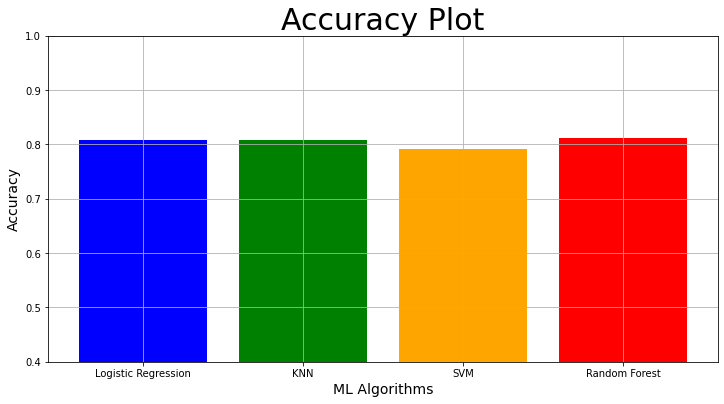

In [ ]:
# Accuracy Plot
plt.figure(figsize=(12,6))
colour = ['blue', 'green', 'orange', 'red']

models = ["Logistic Regression", "KNN", "SVM", "Random Forest"]
ax = plt.gca()
plt.ylim(0.40000, 1)
plt.bar(models, accuracy_score_tf, color=colour)
plt.title('Accuracy Plot', fontsize=30)
plt.xlabel('ML Algorithms', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.grid(True)
plt.show()

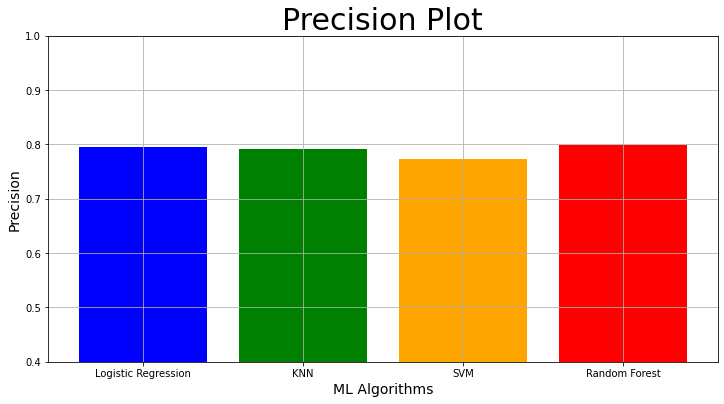

In [ ]:
# Precision Plot
plt.figure(figsize=(12,6))

ax = plt.gca()
plt.ylim(0.40000, 1)
plt.bar(models, precision_score_tf, color=colour)
plt.title('Precision Plot', fontsize=30)
plt.xlabel('ML Algorithms', fontsize=14)
plt.ylabel('Precision', fontsize=14)
plt.grid(True)
plt.show()

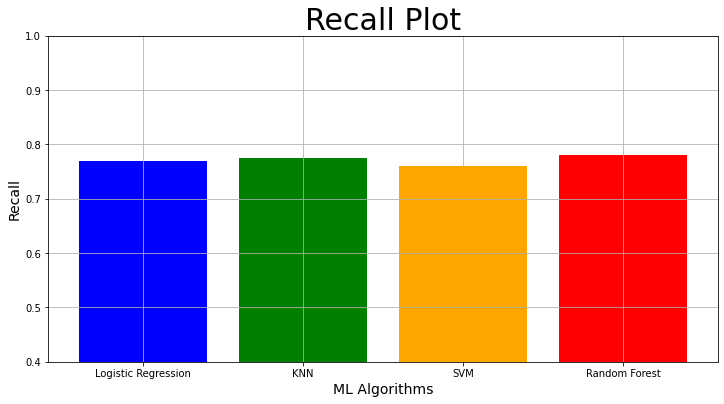

In [ ]:
# Recall Plot
plt.figure(figsize=(12,6))

ax = plt.gca()
plt.ylim(0.40000, 1)
plt.bar(models, recall_score_tf, color=colour)
plt.title('Recall Plot', fontsize=30)
plt.xlabel('ML Algorithms', fontsize=14)
plt.ylabel('Recall', fontsize=14)
plt.grid(True)
plt.show()

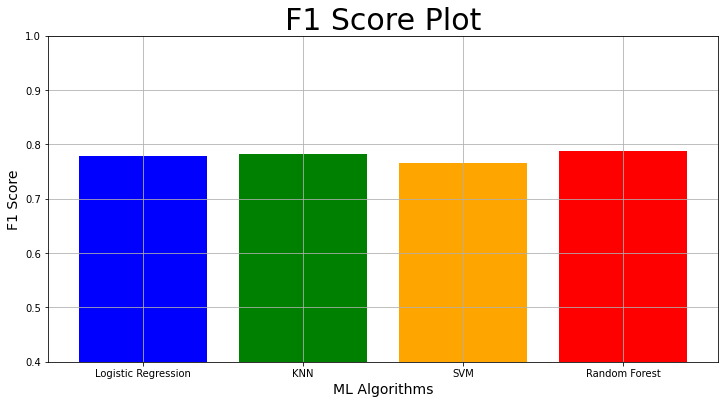

In [ ]:
# F1-Score Plot
plt.figure(figsize=(12,6))

ax = plt.gca()
plt.ylim(0.40000, 1)
plt.bar(models, f1_score_tf, color=colour)
plt.title('F1 Score Plot', fontsize=30)
plt.xlabel('ML Algorithms', fontsize=14)
plt.ylabel('F1 Score', fontsize=14)
plt.grid(True)
plt.show()

[0 1 2 3]


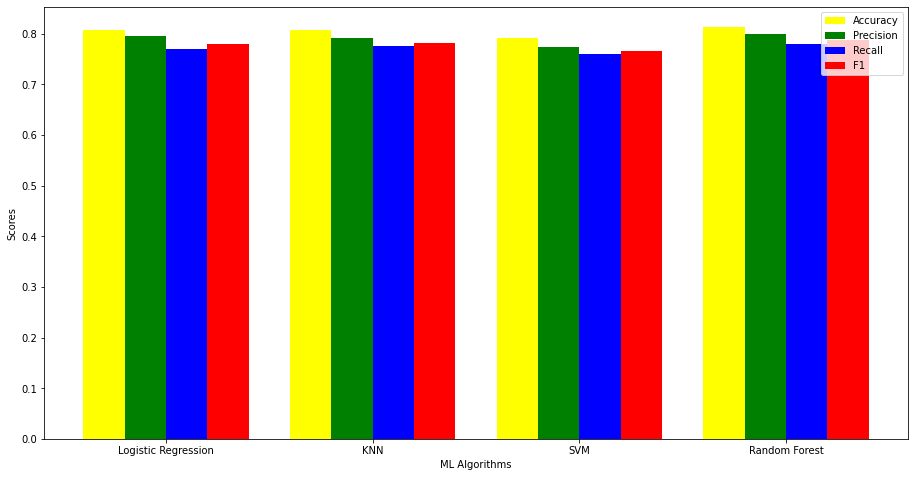

In [ ]:
x = np.arange(4)
fig = plt.figure(figsize=(12,6))
ax = fig.add_axes([0,0,1,1])
ax.bar(x + 0.00, accuracy_score_tf, color = 'yellow', width = 0.20)
ax.bar(x + 0.20, precision_score_tf, color = 'g', width = 0.20)
ax.bar(x + 0.40, recall_score_tf, color = 'blue', width = 0.20)
ax.bar(x + 0.60, f1_score_tf, color = 'red', width = 0.20)
plt.xticks(X+0.30, models)
plt.xlabel("ML Algorithms")
plt.ylabel("Scores")
plt.legend(["Accuracy", "Precision", "Recall", "F1"])